In [28]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [4]:

from sklearn.model_selection import train_test_split
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# 0 - 255
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.3,random_state=46)

In [5]:
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [53]:
data_in = Input(shape=(28,28))
data_flat = Flatten()(data_in)
data_drop = Dropout(0.25)(data_flat)
hidden_1 = Dense(256, activation='elu')(data_drop)
hidden1_drop = Dropout(0.25)(hidden_1)
hidden_2 = Dense(32, activation='elu')(hidden1_drop)
hidden2_drop = Dropout(0.25)(hidden_2)
out = Dense(10, activation='softmax')(hidden2_drop)

model = Model(inputs=data_in, outputs=out)

# compile
model.compile(loss="categorical_crossentropy",
              optimizer='adam', # paling modern
              metrics=['accuracy'])

# training
history = model.fit(x_train, y_train_ohe, epochs=20, validation_data=(x_val,y_val_ohe))

Epoch 1/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4858 - accuracy: 0.8498 - val_loss: 0.2145 - val_accuracy: 0.9366
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3045 - accuracy: 0.9099 - val_loss: 0.1503 - val_accuracy: 0.9551
Epoch 3/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2467 - accuracy: 0.9257 - val_loss: 0.1285 - val_accuracy: 0.9593
Epoch 4/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2157 - accuracy: 0.9345 - val_loss: 0.1131 - val_accuracy: 0.9657
Epoch 5/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1877 - accuracy: 0.9426 - val_loss: 0.0979 - val_accuracy: 0.9702
Epoch 6/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1758 - accuracy: 0.9457 - val_loss: 0.0890 - val_accuracy: 0.9719
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1551 - accuracy: 0.9526 - val_loss: 0.0825 - val_accuracy:

<AxesSubplot:>

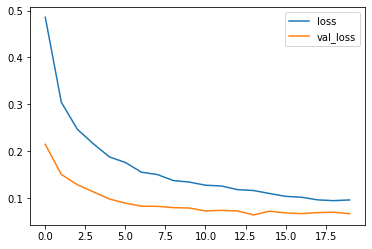

In [58]:
import pandas as pd
metrics = pd.DataFrame(history.history)
metrics[['loss','val_loss']].plot()


In [55]:
model2 = Sequential([
    Flatten(input_shape=(28,28)),
    BatchNormalization(),
    Dropout(0.25),
    Dense(512, activation='selu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation='selu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(32, activation='selu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history2 = model2.fit(x_train, y_train_ohe, epochs=10, validation_data=(x_val,y_val_ohe))

Epoch 1/10
1313/1313 [==============================] - 15s 10ms/step - loss: 0.4737 - accuracy: 0.8564 - val_loss: 0.1795 - val_accuracy: 0.9448
Epoch 2/10
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2797 - accuracy: 0.9156 - val_loss: 0.1251 - val_accuracy: 0.9613
Epoch 3/10
1313/1313 [==============================] - 14s 10ms/step - loss: 0.2204 - accuracy: 0.9339 - val_loss: 0.0969 - val_accuracy: 0.9694
Epoch 4/10
1313/1313 [==============================] - 14s 10ms/step - loss: 0.1882 - accuracy: 0.9425 - val_loss: 0.0866 - val_accuracy: 0.9739
Epoch 5/10
1313/1313 [==============================] - 14s 10ms/step - loss: 0.1630 - accuracy: 0.9497 - val_loss: 0.0827 - val_accuracy: 0.9743
Epoch 6/10
1313/1313 [==============================] - 14s 11ms/step - loss: 0.1488 - accuracy: 0.9550 - val_loss: 0.0727 - val_accuracy: 0.9772
Epoch 7/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.1434 - accuracy: 0.9571 - val_loss: 0.0709 -

<AxesSubplot:>

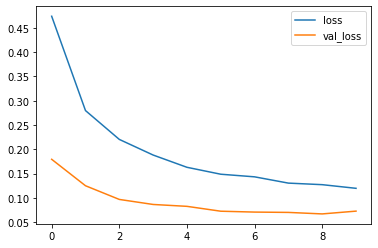

In [56]:
import pandas as pd
metrics = pd.DataFrame(history2.history)
metrics[['loss','val_loss']].plot()


In [57]:


y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

